In [42]:
import math
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
import matplotlib.pyplot as plt

In [61]:
neighborhood_census = pd.read_csv('https://data.boston.gov/dataset/7846ff3b-b738-47a3-a57e-19de2c753220/resource/5800a0a2-6acd-41a3-9fe0-1bf7b038750d/download/redistricting_data_tract20_nbhd_hhpopsize_ab-1.csv')

In [67]:
neighborhood_census.iloc[0]

tract20_nbhd                                        field concept
P0020001                                                   Total:
P0020005                                              White alone
P0020006                          Black or African American alone
P0020002                                       Hispanic or Latino
P002aapi        Asian, Native Hawaiian and Pacific Islander al...
P002others               Other Races or Multiple Races,  all ages
P0040001                                                   Total:
P0040005                                              White alone
P0040006                          Black or African American alone
P0040002                                       Hispanic or Latino
P004aapi        Asian, Native Hawaiian and Pacific Islander al...
P004others                Other Races or Multiple Races, aged 18+
P00x0001                                         Total: aged 0-17
P00x0005                                   White alone, aged 0-17
P00x0006  

In [57]:
neighborhood_census = neighborhood_census.drop(0)

tract20_nbhd        Allston
P0020001              24904
P0020005              12536
P0020006               1326
P0020002               3259
P002aapi               6271
P002others             1512
P0040001              23140
P0040005              11976
P0040006               1184
P0040002               2726
P004aapi               5960
P004others             1294
P00x0001               1764
P00x0005                560
P00x0006                142
P00x0002                533
P00xaapi                311
P00xothers              218
hhpop                 21623
P0050001               3281
P0050002                  0
P0050003                  0
P0050004                  0
P0050005                  0
P0050006                  0
P0050007               3281
P0050008               3214
P0050009                  0
P0050010                 67
H0010001              10748
H0010002              10027
H0010003                721
hhsize          2.156477511
Name: 1, dtype: object

In [58]:
neighborhood_census.head()

,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,P0040006,...,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize
1,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,0,3281,3214,0,67,10748,10027,721,2.156477511
2,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,269,0,1610,1487,0,123,11524,10006,1518,1.630121927
3,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080219
4,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,266,56,3796,3493,0,303,23653,22535,1118,2.126292434
5,Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,...,55,0,55,0,30,25,9525,8932,593,2.128302732


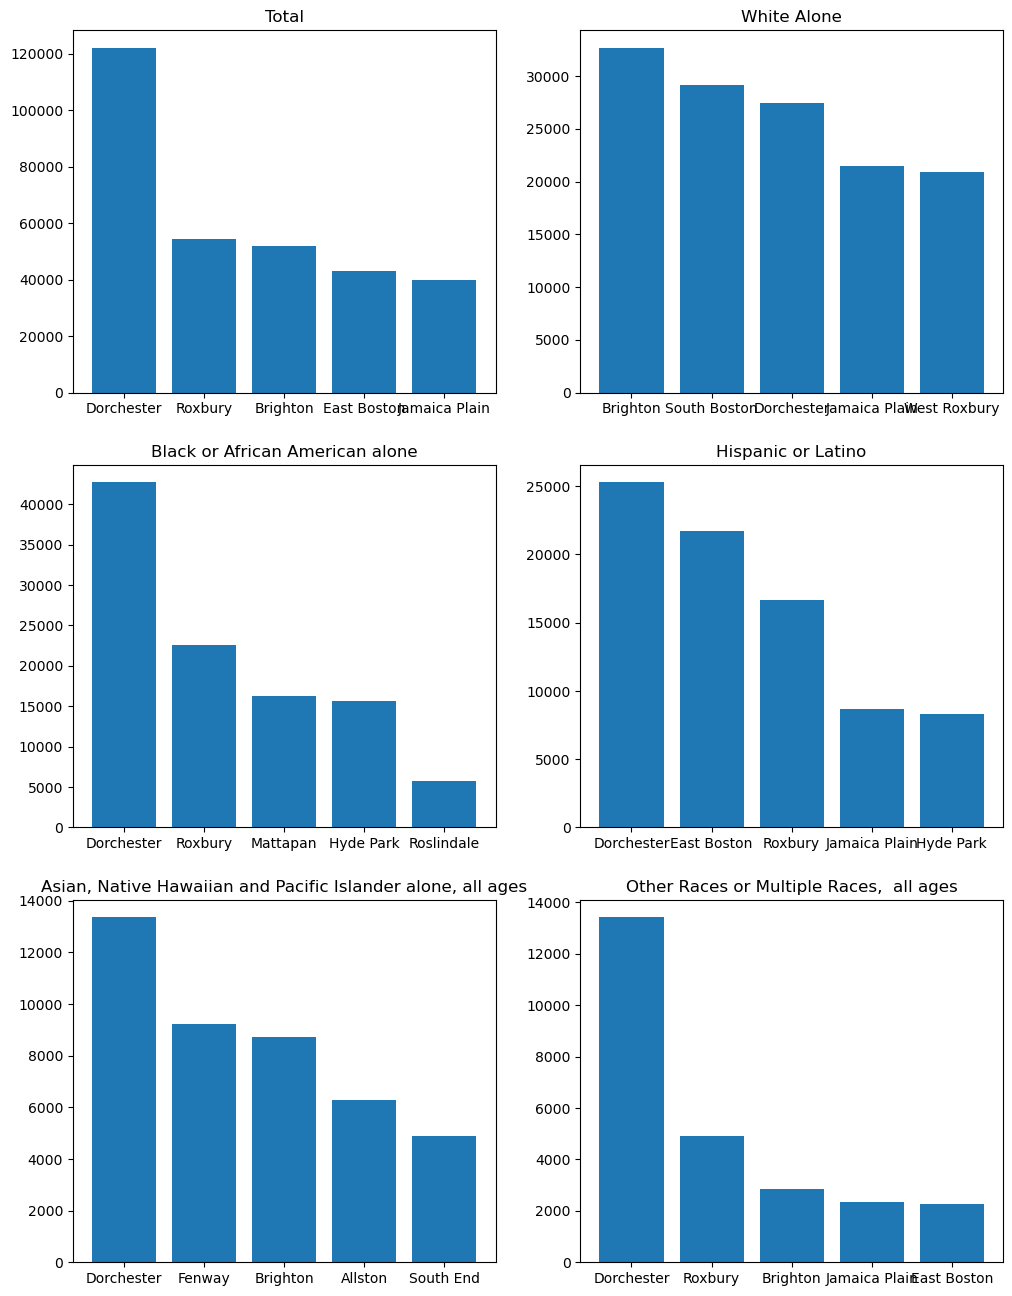

In [73]:
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

columns = ["P0020001", "P0020005", "P0020006", "P0020002", "P002aapi", "P002others"]
races = ['Total', 'White Alone', 'Black or African American alone', 'Hispanic or Latino', 'Asian, Native Hawaiian and Pacific Islander alone, all ages', 'Other Races or Multiple Races,  all ages']
neighborhood_census[columns] = neighborhood_census[columns].apply(pd.to_numeric, errors='coerce')

for i in range(3):
    for j in range(2):
        top_n = neighborhood_census.nlargest(5, columns[i * 2 + j])
        axs[i, j].bar(top_n['tract20_nbhd'], top_n[columns[i * 2 + j]])
        axs[i, j].set_xticks(top_n['tract20_nbhd'])
        axs[i, j].set_title(f'{races[i * 2 + j]}')

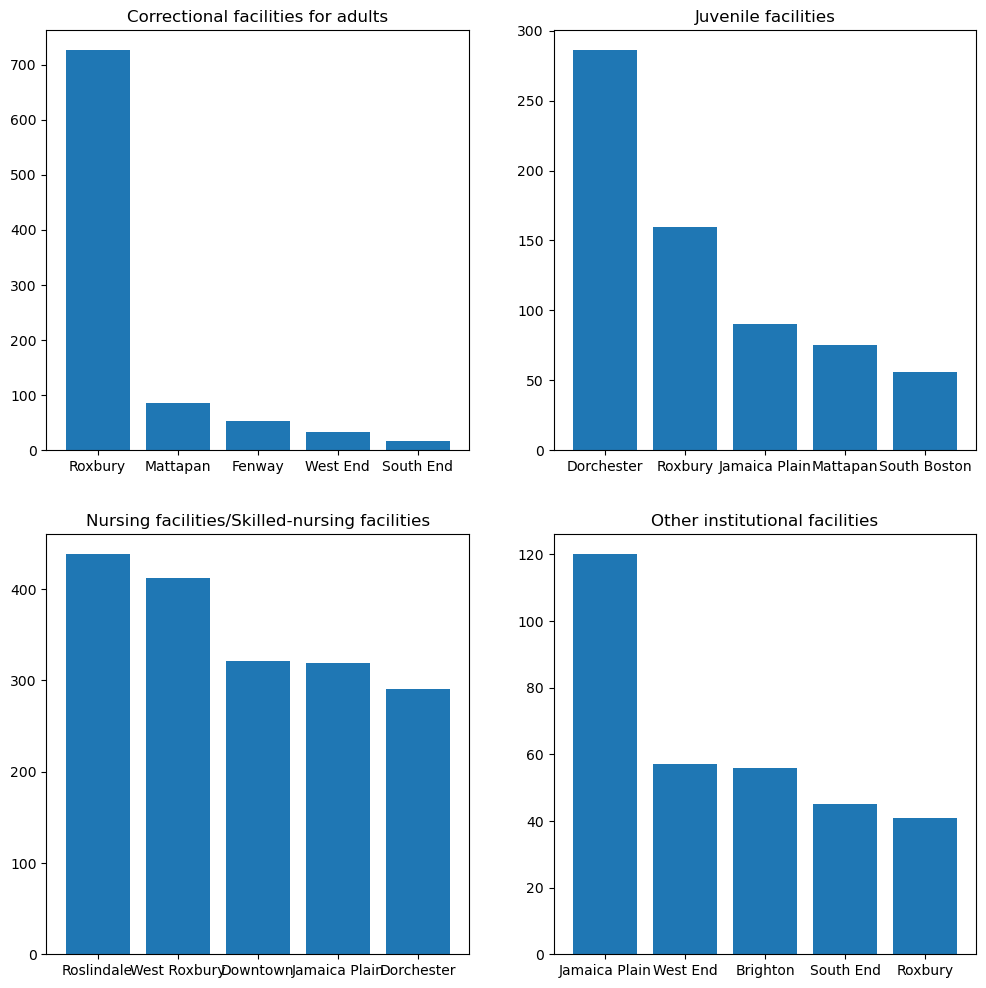

In [78]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

institution_columns = ["P0050003", "P0050004", "P0050005", "P0050006"]
institutions = [
    "Correctional facilities for adults",
    "Juvenile facilities",
    "Nursing facilities/Skilled-nursing facilities",
    "Other institutional facilities"
]

neighborhood_census[institution_columns] = neighborhood_census[institution_columns].apply(pd.to_numeric, errors='coerce')

for i in range(2):
    for j in range(2):
        top_n = neighborhood_census.nlargest(5, institution_columns[i * 2 + j])
        axs[i, j].bar(top_n['tract20_nbhd'], top_n[institution_columns[i * 2 + j]])
        axs[i, j].set_xticks(top_n['tract20_nbhd'])
        axs[i, j].set_title(f'{institutions[i * 2 + j]}')

In [79]:
data_dir = '../'
stops_df = pd.read_csv(data_dir+'stops_with_neighborhoods.csv')

<Axes: xlabel='neighborhood'>

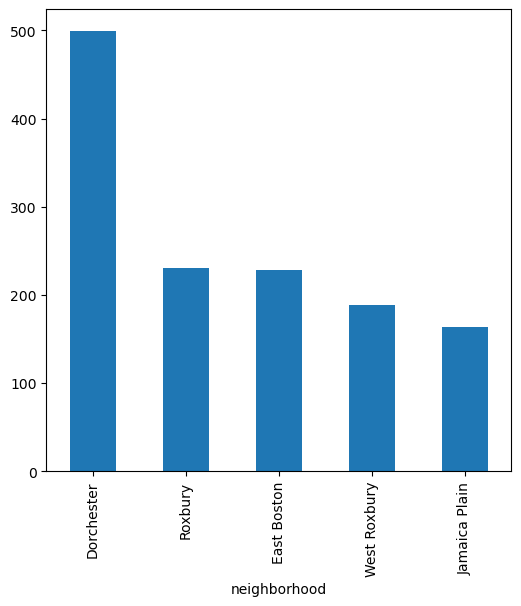

In [90]:
stops_df.groupby('neighborhood').size().sort_values(ascending=False).head(5).plot.bar(figsize=(6,6))

<Axes: ylabel='neighborhood'>

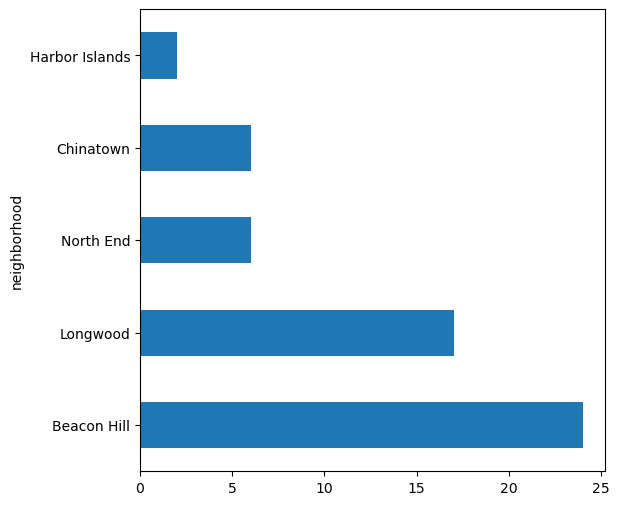

In [140]:
stops_df.groupby('neighborhood').size().sort_values(ascending=False).tail(5).plot(kind='barh', figsize=(6,6))

In [95]:
routes_and_neighborhoods = pd.read_csv(data_dir + 'routes_and_neighborhoods.csv')
routes_and_neighborhoods.head()

,route_id,neighborhood
0,95,Charlestown
1,93,West End
2,93,North End
3,93,Downtown
4,93,Charlestown


<Axes: ylabel='neighborhood'>

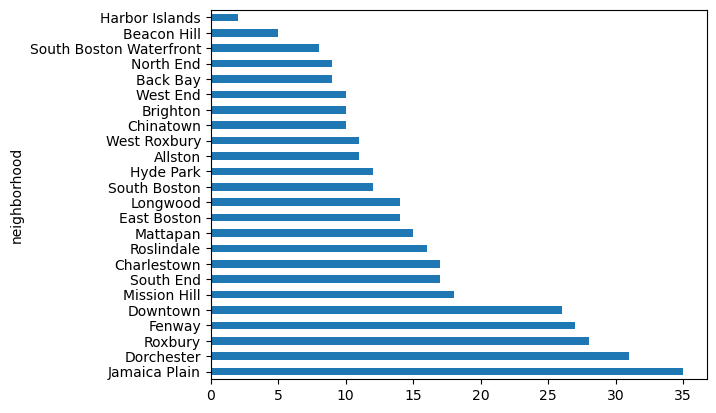

In [127]:
routes_and_neighborhoods.groupby('neighborhood').size().sort_values(ascending=False).plot(kind='barh')

<Axes: ylabel='neighborhood'>

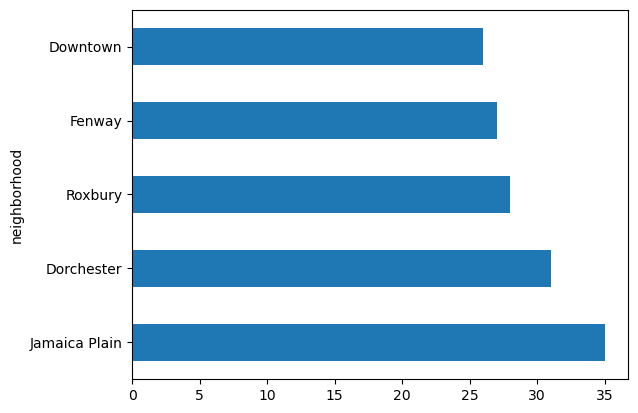

In [128]:
routes_and_neighborhoods.groupby('neighborhood').size().sort_values(ascending=False).head(5).plot(kind='barh')

<Axes: ylabel='neighborhood'>

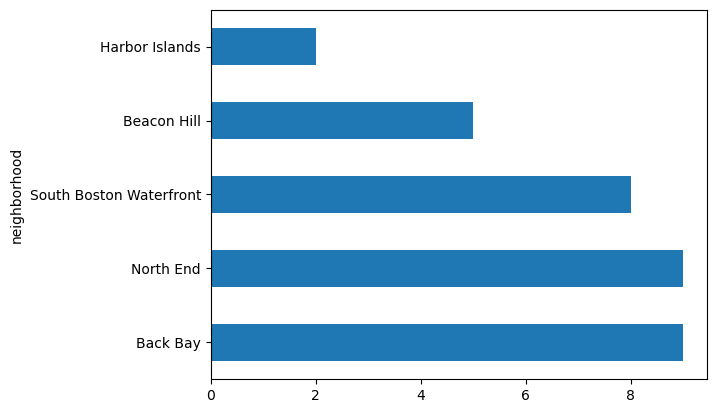

In [129]:
routes_and_neighborhoods.groupby('neighborhood').size().sort_values(ascending=False).tail(5).plot(kind='barh')

In [102]:
routes_and_neighborhoods.groupby('neighborhood').size()

neighborhood
Allston                    11
Back Bay                    9
Beacon Hill                 5
Brighton                   10
Charlestown                17
Chinatown                  10
Dorchester                 31
Downtown                   26
East Boston                14
Fenway                     27
Harbor Islands              2
Hyde Park                  12
Jamaica Plain              35
Longwood                   14
Mattapan                   15
Mission Hill               18
North End                   9
Roslindale                 16
Roxbury                    28
South Boston               12
South Boston Waterfront     8
South End                  17
West End                   10
West Roxbury               11
dtype: int64

In [104]:
neighborhoods_df = routes_and_neighborhoods.groupby('neighborhood').size().reset_index(name='Routes Count')

In [105]:
neighborhoods_df = pd.merge(neighborhoods_df, stops_df.groupby('neighborhood').size().reset_index(name='Stops Count'), on='neighborhood', how='outer')

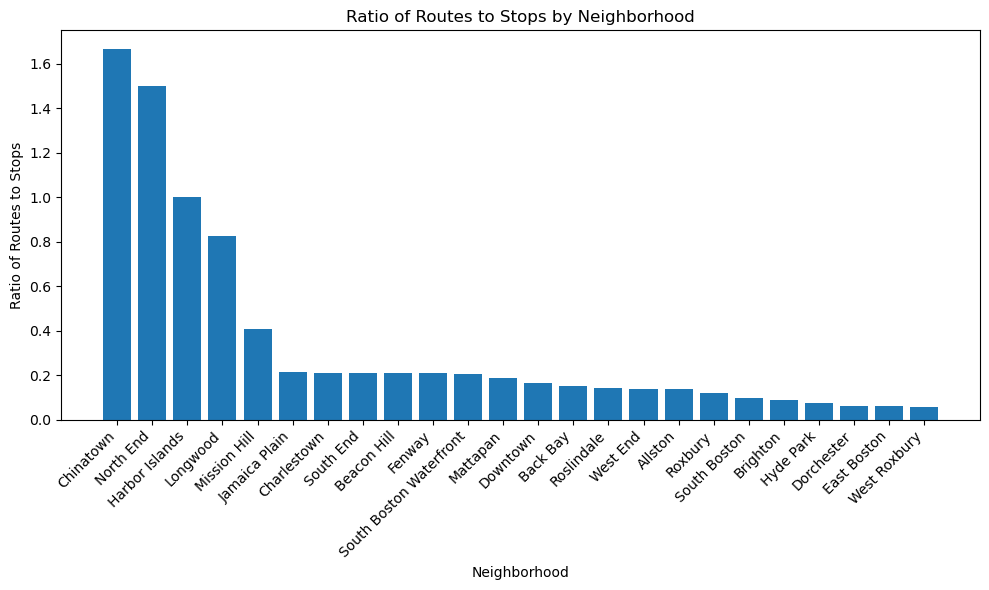

In [131]:
neighborhoods_df['Ratio'] = neighborhoods_df['Routes Count'] / neighborhoods_df['Stops Count']
neighborhoods_df = neighborhoods_df.sort_values(by='Ratio', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(neighborhoods_df['neighborhood'], neighborhoods_df['Ratio'])
plt.xlabel('Neighborhood')
plt.ylabel('Ratio of Routes to Stops')
plt.title('Ratio of Routes to Stops by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [116]:
delay_time_df = pd.read_csv(data_dir + 'mean_delay_time.csv')
routes_and_neighborhoods = pd.merge(routes_and_neighborhoods, delay_time_df, on='route_id', how='left')

In [117]:
routes_and_neighborhoods.head()

,route_id,neighborhood,delay_time
0,95,Charlestown,1.761880
1,93,West End,2.410347
2,93,North End,2.410347
3,93,Downtown,2.410347
4,93,Charlestown,2.410347


<Axes: ylabel='neighborhood'>

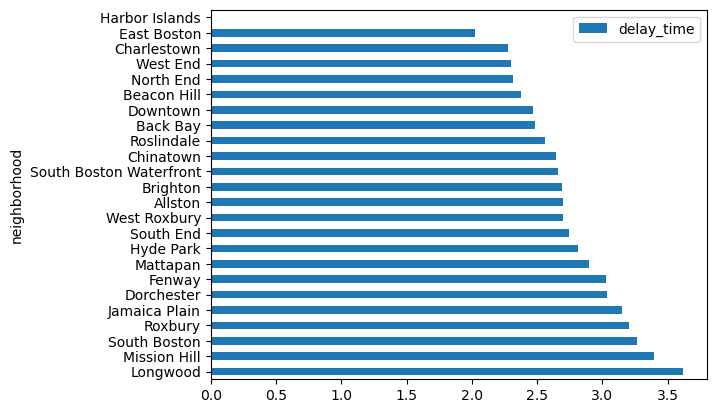

In [132]:
routes_and_neighborhoods[['neighborhood', 'delay_time']].groupby('neighborhood').mean().sort_values(by='delay_time', ascending=False).plot(kind='barh')

<Axes: ylabel='neighborhood'>

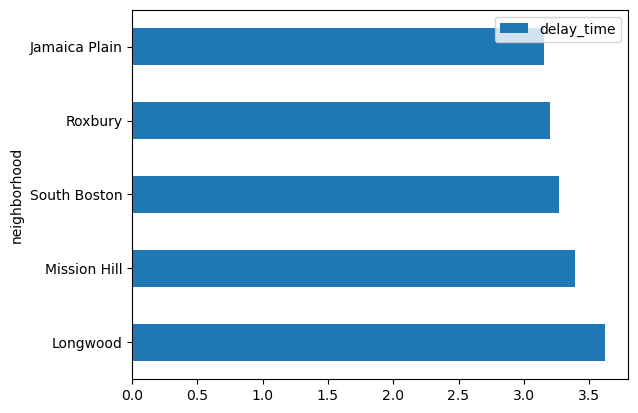

In [133]:
routes_and_neighborhoods[['neighborhood', 'delay_time']].groupby('neighborhood').mean().sort_values(by='delay_time', ascending=False).head(5).plot(kind='barh')

<Axes: ylabel='neighborhood'>

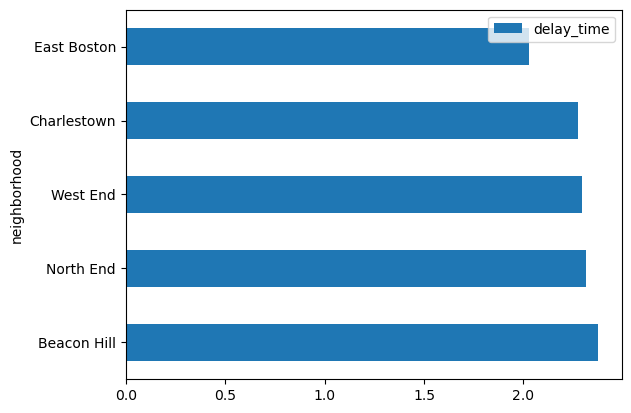

In [139]:
routes_and_neighborhoods[['neighborhood', 'delay_time']].groupby('neighborhood').mean().sort_values(by='delay_time', ascending=False).tail(6)[:-1].plot(kind='barh')